In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [29]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
path = '/content/seeds_dataset.txt'
    
     

In [31]:
features = ['Area','Perimeter','Compactness','Length of kernel','Width of kernel','Asymmetry coefficient','groove']

df = pd.read_csv(path,delimiter=r'[\t]+', header=None, names=features + ['target'])
display(df)
print(df.dtypes)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Area                     float64
Perimeter                float64
Compactness              float64
Length of kernel         float64
Width of kernel          float64
Asymmetry coefficient    float64
groove                   float64
target                     int64
dtype: object


In [32]:
X = df.loc[:, features]
y = df.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0)

scaler = StandardScaler()

X_train_std = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test_std = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)
print('Labels counts in y:', np.bincount(y)[1:])
print('Labels counts in y_train:', np.bincount(y_train)[1:])
print('Labels counts in y_test:', np.bincount(y_test)[1:])

Labels counts in y: [70 70 70]
Labels counts in y_train: [56 56 56]
Labels counts in y_test: [14 14 14]


In [33]:
X_train_std 

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,groove
0,-1.173302,-1.094460,-1.560085,-1.014018,-1.428453,-1.005126,-0.556596
1,-0.808338,-0.841608,-0.201517,-0.810632,-0.766174,0.515292,-0.817674
2,-0.446818,-0.542783,0.694381,-0.629596,-0.261453,-0.752184,-0.464214
3,0.186704,0.077853,1.194906,-0.341279,0.563726,-0.052101,0.059950
4,1.085340,0.997315,1.203318,0.581782,1.175266,-1.110864,0.859250
...,...,...,...,...,...,...,...
163,-1.410872,-1.400947,-1.585322,-1.083303,-1.634081,0.709490,-0.895997
164,1.350455,1.257829,1.169669,1.212056,1.447655,-0.383828,1.293042
165,-0.250564,-0.289931,0.479870,-0.198238,-0.087872,-0.636770,-0.745375
166,0.028323,-0.098377,1.262204,-0.549135,0.422190,-1.750822,-0.644961


In [34]:

X_test_std 

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,groove
0,-1.152643,-1.025500,-1.862924,-0.727936,-1.492545,1.183584,-0.199120
1,-0.250564,-0.228634,0.067673,-0.245173,-0.229407,-0.682383,-0.381874
2,0.682503,0.729138,0.336863,0.865629,0.619806,0.227103,0.867284
3,1.243720,1.196531,0.904686,1.066780,1.375552,-0.995451,0.772894
4,-1.180188,-1.232379,-0.613714,-1.206229,-1.278906,0.885721,-1.173142
5,-0.012993,-0.029417,0.492488,0.058789,0.091051,-0.389357,-0.201128
6,0.551667,0.529922,0.732236,0.568372,0.670545,-1.179283,0.248729
7,-1.379885,-1.224717,-2.552723,-0.786047,-1.636751,1.041218,-0.450156
8,0.961390,1.089261,-0.138426,1.254521,0.820092,0.276862,1.307100
9,1.608684,1.648600,0.311626,1.645649,1.461008,-0.493022,1.558136


In [35]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [4.99183688e+00 1.25166606e+00 7.05133386e-01 6.78385251e-02
 1.96225918e-02 8.17253250e-04 5.00147226e-03]


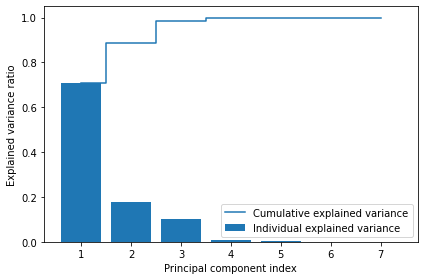

In [36]:

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, len(features) + 1), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, len(features) + 1), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('figures/05_02.png', dpi=300)
plt.show()

In [37]:
pca = PCA(n_components=len(features))
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca[:, [0, 1]], y_train)

Text(0.5, 0.5, 'PC2 2')

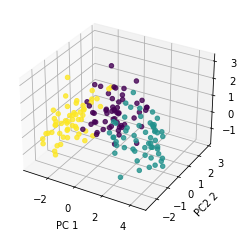

In [38]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], alpha=0.8,
            c=y_train)
plt.xlabel('PC 1')
plt.ylabel('PC2 2')

Text(0.5, 0.5, 'PC2 2')

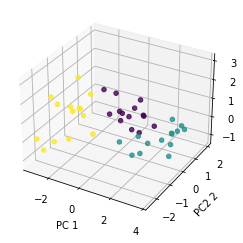

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], alpha=0.8,
            c=y_test)
plt.xlabel('PC 1')
plt.ylabel('PC2 2')

In [40]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

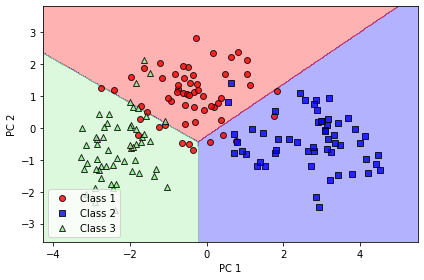

In [41]:
plot_decision_regions(X_train_pca[:, [0, 1]], y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_04.png', dpi=300)
plt.show()
     

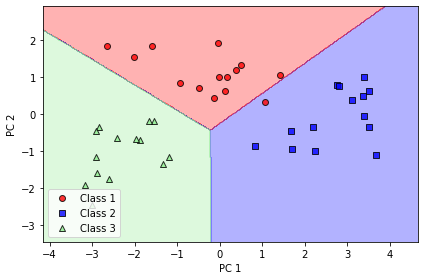

In [42]:
plot_decision_regions(X_test_pca[:, [0, 1]], y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_04.png', dpi=300)
plt.show()

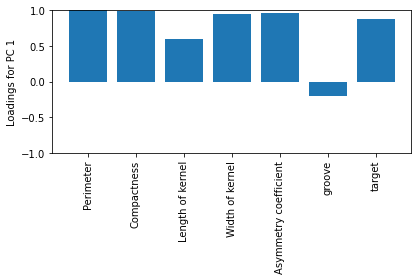

In [43]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()

ax.bar(range(len(features)), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(len(features)))
ax.set_xticklabels(df.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()
     

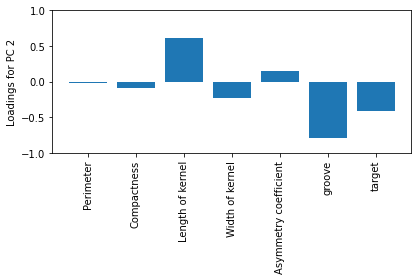

In [44]:
fig, ax = plt.subplots()

ax.bar(range(len(features)), loadings[:, 1], align='center')
ax.set_ylabel('Loadings for PC 2')
ax.set_xticks(range(len(features)))
ax.set_xticklabels(df.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

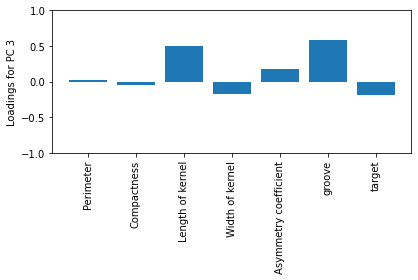

In [45]:
fig, ax = plt.subplots()

ax.bar(range(len(features)), loadings[:, 2], align='center')
ax.set_ylabel('Loadings for PC 3')
ax.set_xticks(range(len(features)))
ax.set_xticklabels(df.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()
     

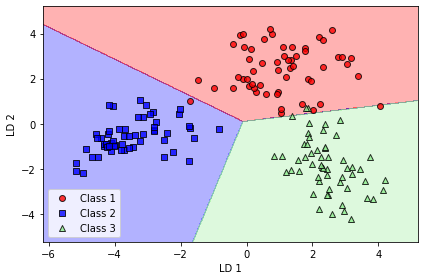

In [46]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_09.png', dpi=300)
plt.show()

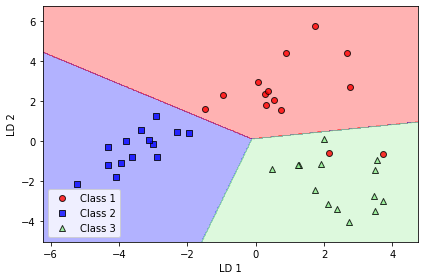

In [47]:
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_09.png', dpi=300)
plt.show()
     